In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazonreviews/test.ft.txt.bz2
/kaggle/input/amazonreviews/train.ft.txt.bz2
/kaggle/input/amazon-reviews/train.csv
/kaggle/input/amazon-reviews/test.csv


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [3]:
train_df = pd.read_csv('/kaggle/input/amazon-reviews/train.csv') 
test_df= pd.read_csv('/kaggle/input/amazon-reviews/test.csv')

In [4]:
# nltk.data.path.append('/kaggle/input/YOUR-UPLOADED-NLTK-DATA/nltk_data')


In [5]:
train_df.head()


,label,text
0,positive,Stuning even for the non-gamer: This sound tra...
1,positive,The best soundtrack ever to anything.: I'm rea...
2,positive,Amazing!: This soundtrack is my favorite music...
3,positive,Excellent Soundtrack: I truly like this soundt...
4,positive,"Remember, Pull Your Jaw Off The Floor After He..."


In [6]:
train_df.columns

Index(['label', 'text'], dtype='object')

In [7]:
train_df['label'].value_counts()


label
positive    1800000
negative    1800000
Name: count, dtype: int64

In [8]:
train_df['text'][0]

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [9]:
for df in [train_df, test_df]:
    df['text'] = df['text'].str.replace(r"[^a-zA-Z\s]", '', regex=True)
    df['text'] = df['text'].str.lower().str.strip()
    #df['text'] = df['text'].apply(remove_stopwords)


In [10]:
sw = set(stopwords.words('english'))
negations = {"no", "not", "nor", "dont", "didnt", "isnt", "wasnt", "shouldnt", "wont", "cant", "couldnt"}
sw = sw.difference(negations)

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in sw])

train_df['text'] = train_df['text'].apply(remove_stopwords)
test_df['text'] = test_df['text'].apply(remove_stopwords)

## Attempted Lemmatization

In [11]:
# import nltk
# nltk.data.path.append('/usr/share/nltk_data')


In [12]:
# from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet
# from nltk import pos_tag, word_tokenize

# lemmatizer = WordNetLemmatizer()

# def get_wordnet_pos(tag):
#     if tag.startswith('J'):
#         return wordnet.ADJ
#     elif tag.startswith('V'):
#         return wordnet.VERB
#     elif tag.startswith('N'):
#         return wordnet.NOUN
#     elif tag.startswith('R'):
#         return wordnet.ADV
#     else:
#         return wordnet.NOUN

# def lemmatize_nltk(text):
#     words = word_tokenize(text)
#     tagged_words = pos_tag(words)
#     lemmatized = [lemmatizer.lemmatize(w, get_wordnet_pos(pos)) for w, pos in tagged_words]
#     return ' '.join(lemmatized)


In [13]:
# train_df['text'] = train_df['text'].apply(lemmatize_nltk)
# test_df['text'] = test_df['text'].apply(lemmatize_nltk)


In [14]:
train_df['text'][0]


'stuning even nongamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen'

#### We’ll use TF-IDF (or CountVectorizer) to convert the text into numbers the model can understand.



In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # You can tweak this number
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

y_train = train_df['label']
y_test = test_df['label']


In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8979875

Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.90      0.90    200000
    positive       0.90      0.90      0.90    200000

    accuracy                           0.90    400000
   macro avg       0.90      0.90      0.90    400000
weighted avg       0.90      0.90      0.90    400000



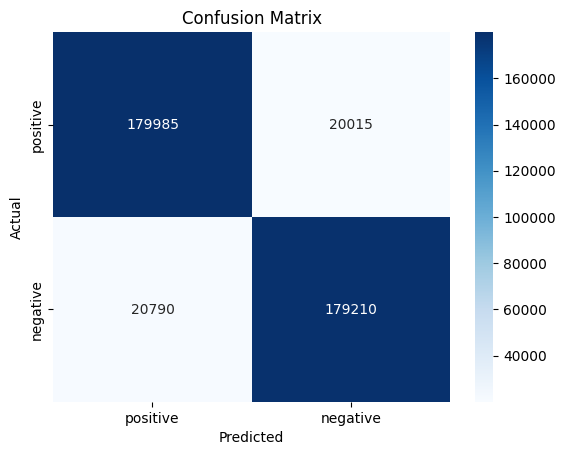

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Predicting 

In [19]:
# def predict_sentiment(text):
#     # Clean input
#     cleaned = re.sub(r"[^a-zA-Z\s]", '', text)
#     cleaned = cleaned.lower().strip()
#     cleaned = ' '.join([word for word in cleaned.split() if word not in sw])
    
#     # Vectorize and predict
#     vec = vectorizer.transform([cleaned])
#     prediction = model.predict(vec)[0]
#     return prediction

In [20]:
# user_input = input("Enter a review: ")
# print("Predicted sentiment:", predict_sentiment(user_input))


In [21]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.svm import LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neural_network import MLPClassifier
# from sklearn.metrics import accuracy_score, classification_report

# models = {
#     'Logistic Regression': LogisticRegression(max_iter=1000),
#     'Naive Bayes': MultinomialNB(),
#     'Linear SVM': LinearSVC(),
#     'Random Forest': RandomForestClassifier(n_estimators=100),
#     'MLP (Neural Net)': MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)
# }

# results = {}

# for name, model in models.items():
#     model.fit(X_train, y_train)
#     preds = model.predict(X_test)
#     acc = accuracy_score(y_test, preds)
#     results[name] = acc
#     print(f"\n{name} Accuracy: {acc:.4f}")
#     print(classification_report(y_test, preds))


In [22]:
import pickle

# Save the model
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)


In [23]:
# Load the model
with open('logistic_regression_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)
